# Code for Experiment 3 - Maxwell Model

In [56]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook

## Data

In [116]:
U = 5 # V

# Measurements
# f (Hz), U_0 (V), V_0 (V), T (ms), phi_Z (°), R (Ohm)
data = np.array([
    [500000,1.4,0.6,0.002,-161.5,0.2],
    [100000,4.3,1.0,0.01,-78.1,30],
    [50000,4.8,0.6,0.02,-82.9,30],
    [10000,5.0,232e-3,0.1,-79.6,60],
    [6000,5.0,0.9,0.168,-67.4,400],
    [2000,5.0,0.8,0.5,-48.7,1000],
    [1500,5.0,0.7,0.672,-42.8,1000],
    [1000,5.0,0.6,1.0,-33.4,1000],
    [500,5.1,0.5,2.0,-18.8,1000],
    [100,5.1,0.5,10,-04.0,1000],
    [50,5.1,0.5,20,-02.3,1000]
])

f     = data[:,0] # in Hz
U_0   = data[:,1] # in V
V_0   = data[:,2] # in V
T     = data[:,3] # in ms
T     = T * 1e-3 # in s
phi_Z = data[:,4] # in °
phi_Z = phi_Z * np.pi/180 # convert to radians
R     = data[:,5] # in Ohm


## Data Analysis

### Calculating and plotting impedance

Resistance R = 9000 Ω
Capacitance C = 12.22 nF


<IPython.core.display.Javascript object>


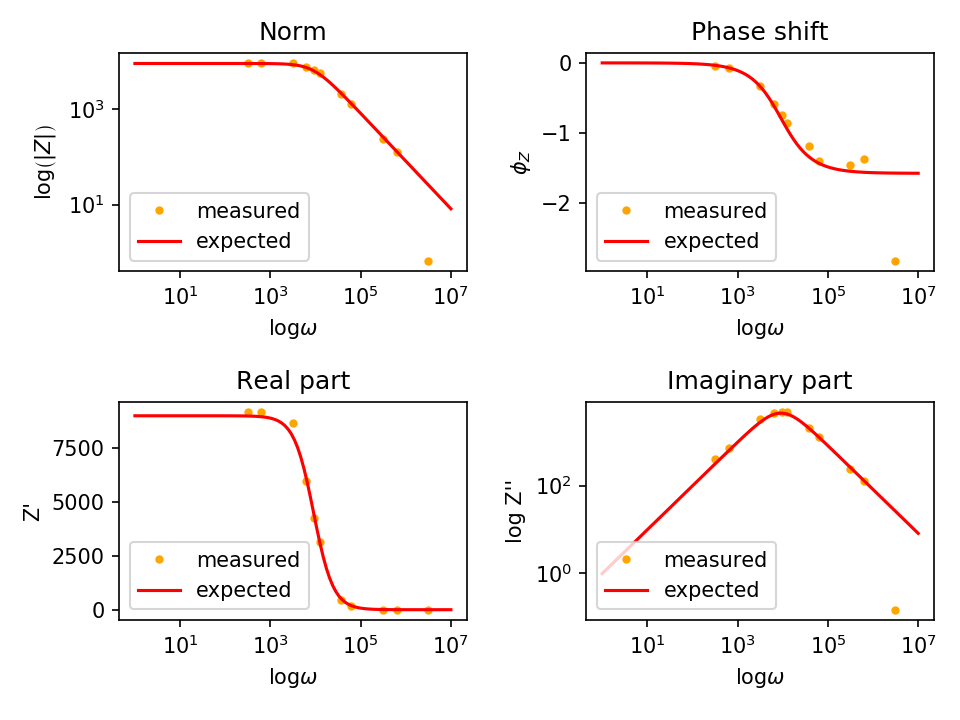

In [121]:
# Complex unit
i = 1j

# Calculate circular velocity
omega = 2 * np.pi * f

# Calculate experimental impedance
Z_hat      = (U_0 / V_0 * np.exp(i * phi_Z) - 1) * R
Z_hat_norm = np.abs(Z_hat) # get norm of Z_hat
Z_hat_real = Z_hat.real    # get real part of Z_hat
Z_hat_im   = -Z_hat.imag   # get imaginary part of Z_hat

# Calculate expected impedance
R1  = 9000   # Ohm
tau = 110e-6
C   = tau/R1 # in F
om  = np.logspace(0, 7, 100)
Z_expected      = R1*((1 - i*om*tau)/(1 + om**2 * tau**2))
Z_expected_norm = np.abs(Z_expected)
Z_expected_real = Z_expected.real
Z_expected_im   = -Z_expected.imag
phi_Z_expected  = np.angle(Z_expected)

# Plots and prints
print(f'Resistance R = {R1} \u03a9')
print(f'Capacitance C = {round(C*1e9,2)} nF')
fig, axs = plt.subplots(2, 2)
axs[0, 0].loglog(omega, Z_hat_norm, '.', color='orange', label='measured')
axs[0, 0].plot(om, Z_expected_norm, '-', color='r', label='expected')
axs[0, 0].set_title('Norm')
axs[0, 0].set_xlabel(r'$\log{\omega}$')
axs[0, 0].set_ylabel(r'$\log\left(|Z|\right)$')
axs[0, 0].legend(loc='lower left')

axs[0, 1].semilogx(omega, phi_Z, '.', color='orange', label='measured')
axs[0, 1].plot(om, phi_Z_expected, color='r', label='expected')
axs[0, 1].set_title('Phase shift')
axs[0, 1].set_ylabel('$\phi_Z$')
axs[0, 1].set_xlabel('$\log{\omega}$')
axs[0, 1].legend(loc='lower left')

axs[1, 0].semilogx(omega, Z_hat_real, '.', color='orange', label='measured')
axs[1, 0].plot(om, Z_expected_real, '-', color='r', label='expected')
axs[1, 0].set_title('Real part')
axs[1, 0].set_xlabel(r'$\log{\omega}$')
axs[1, 0].set_ylabel('Z\'')
axs[1, 0].legend(loc='lower left')

axs[1, 1].loglog(omega, Z_hat_im, '.', color='orange', label='measured')
axs[1, 1].plot(om, Z_expected_im, '-', color='r', label='expected')
axs[1, 1].set_title('Imaginary part')
axs[1, 1].set_xlabel(r'$\log{\omega}$')
axs[1, 1].set_ylabel('log Z\'\'')
axs[1, 1].legend(loc='lower left')

plt.tight_layout()
plt.show()

### Calculating and plotting modulus

<IPython.core.display.Javascript object>


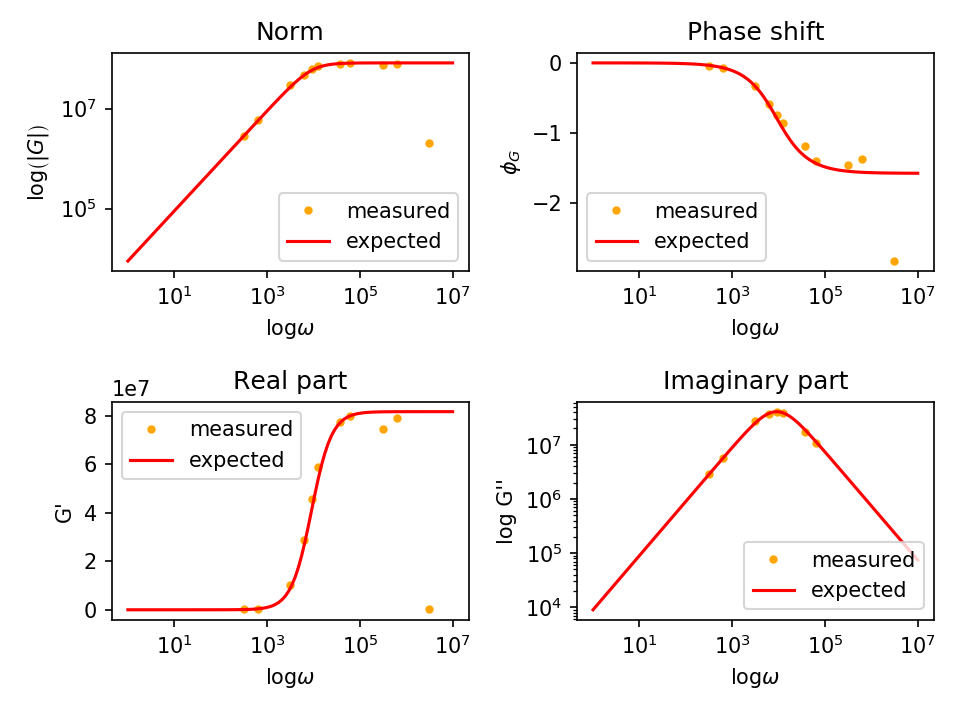

In [127]:
# Calculate experimental modulus
G      = i*omega*Z_hat
G_norm = np.abs(G)
G_real = G.real
G_im   = G.imag
phi_G  = np.angle(G)

# Calculate expected modulus
G_expected      = i * om * Z_expected
G_expected_norm = np.abs(G_expected)
G_expected_real = G_expected.real
G_expected_im   = G_expected.imag
phi_G_expected  = np.angle(G_expected)

# Plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].loglog(omega, G_norm, '.', color='orange', label='measured')
axs[0, 0].plot(om, G_expected_norm, '-', color='r', label='expected')
axs[0, 0].set_title('Norm')
axs[0, 0].set_xlabel(r'$\log{\omega}$')
axs[0, 0].set_ylabel(r'$\log\left(|G|\right)$')
axs[0, 0].legend(loc='lower right')

axs[0, 1].semilogx(omega, phi_Z, '.', color='orange', label='measured')
axs[0, 1].plot(om, phi_Z_expected, color='r', label='expected')
axs[0, 1].set_title('Phase shift')
axs[0, 1].set_ylabel('$\phi_G$')
axs[0, 1].set_xlabel('$\log{\omega}$')
axs[0, 1].legend(loc='lower left')

axs[1, 0].semilogx(omega, G_real, '.', color='orange', label='measured')
axs[1, 0].plot(om, G_expected_real, '-', color='r', label='expected')
axs[1, 0].set_title('Real part')
axs[1, 0].set_xlabel(r'$\log{\omega}$')
axs[1, 0].set_ylabel('G\'')
axs[1, 0].legend(loc='upper left')

axs[1, 1].loglog(omega, G_im, '.', color='orange', label='measured')
axs[1, 1].plot(om, G_expected_im, '-', color='r', label='expected')
axs[1, 1].set_title('Imaginary part')
axs[1, 1].set_xlabel(r'$\log{\omega}$')
axs[1, 1].set_ylabel('log G\'\'')
axs[1, 1].legend(loc='lower right')

plt.tight_layout()
plt.show()